# 데이터 로딩

In [ ]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터 로딩 0~9까지 이루어져있는 데이터

In [ ]:
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(data[0])

2

In [ ]:
(X_train, y_train), (X_test,y_test) = data

In [ ]:
# 데이터 모양(shape) 확인
print(f'X_train:{X_train.shape}, y_train :{y_train.shape}' )
print(f'X_test :{X_test.shape}, y_test  :{y_test.shape}' )

X_train:(60000, 28, 28), y_train :(60000,)
X_test :(10000, 28, 28), y_test  :(10000,)


In [ ]:
X_train[0]

# 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt


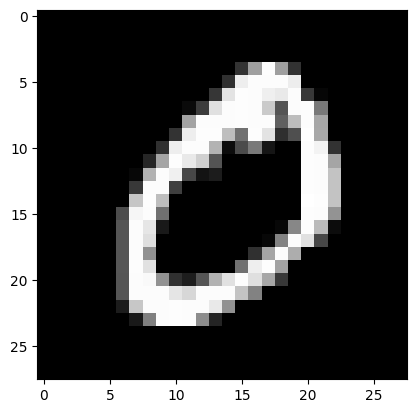

In [ ]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [ ]:
import numpy as np

In [ ]:
# 라벨의 종류
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 라벨의 빈도수
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

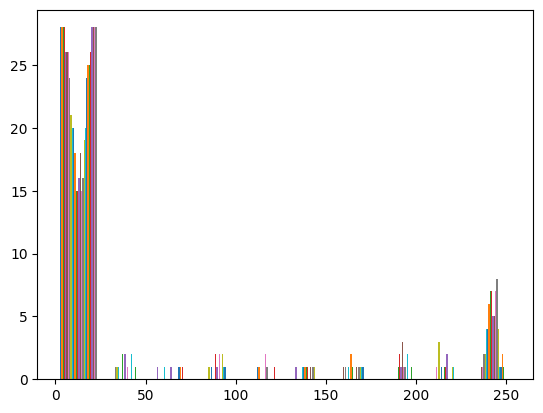

In [ ]:
plt.hist(X_train[0])
plt.show()

# 모델링
1. 모델 구조/설계
2. 모델 학습/평가 방법 설정
3. 모델 학습 및 결과 시각화

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# 딥러닝의 다중분류 -> 최종 예측을 위해 확률 값을 계산
# -> 정답 데이터를 확률 정보로 바꿔주어야 한다! -> one-hot encoding
to_categorical(y_train[:5])
# 10개의 숫자 (0, 1, 2, ..... 8, 9 일 확률값)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# 1. 모델 구조 설계
mnist_model = Sequential()

mnist_model.add( InputLayer (input_shape = (28,28)))
mnist_model.add( Flatten()) # 입력된 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add( Dense(units= 512, activation = 'sigmoid') ) # 중간층(은닉층)
mnist_model.add( Dense(units= 256, activation = 'sigmoid') )
mnist_model.add( Dense(units= 128, activation = 'sigmoid') )
mnist_model.add( Dense(units= 64, activation = 'sigmoid') )
mnist_model.add( Dense(units= 32, activation = 'sigmoid') )
mnist_model.add( Dense(units= 10, activation = 'softmax') ) # 출력층
# 다중분류 출력층의 units= 클래스 수, 활성화함수 = 'softmax'

In [ ]:
# 2. 모델 학습/ 평가 방법 설정
mnist_model.compile( loss = "categorical_crossentropy",
                    optimizer ='adam',
                     metrics = ['accuracy']
                     )

In [ ]:
# 3. 모델 학습 및 학습결과 시각화

In [ ]:
mnist_history = mnist_model.fit(X_train, y_train_one_hot,
                                validation_split = 0.2, epochs =100)

Epoch 1/100
1500/1500 [==============================] - 13s 4ms/step - loss: 0.9245 - accuracy: 0.7145 - val_loss: 0.5249 - val_accuracy: 0.8526
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4581 - accuracy: 0.8654 - val_loss: 0.3985 - val_accuracy: 0.8845
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3598 - accuracy: 0.8924 - val_loss: 0.3212 - val_accuracy: 0.8998
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2985 - accuracy: 0.9107 - val_loss: 0.2726 - val_accuracy: 0.9189
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.9146 - val_loss: 0.2309 - val_accuracy: 0.9315
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2409 - accuracy: 0.9263 - val_loss: 0.2138 - val_accuracy: 0.9362
Epoch 7/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2342 - accuracy: 0.9283 - val_loss: 0.2274 - val_a

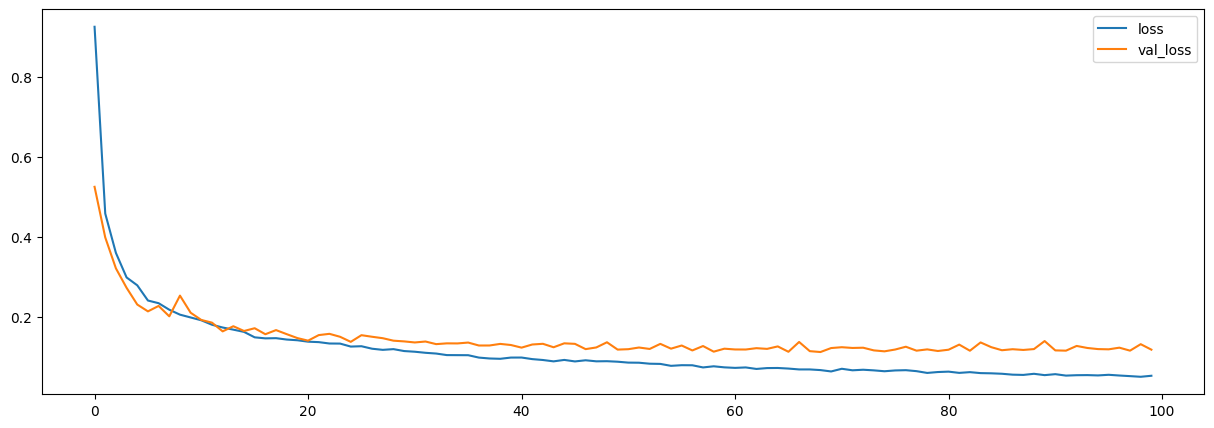

In [ ]:
plt.figure(figsize=(15,5)) # 가로, 세로
plt.plot(mnist_history.history['loss'], label='loss')
plt.plot(mnist_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

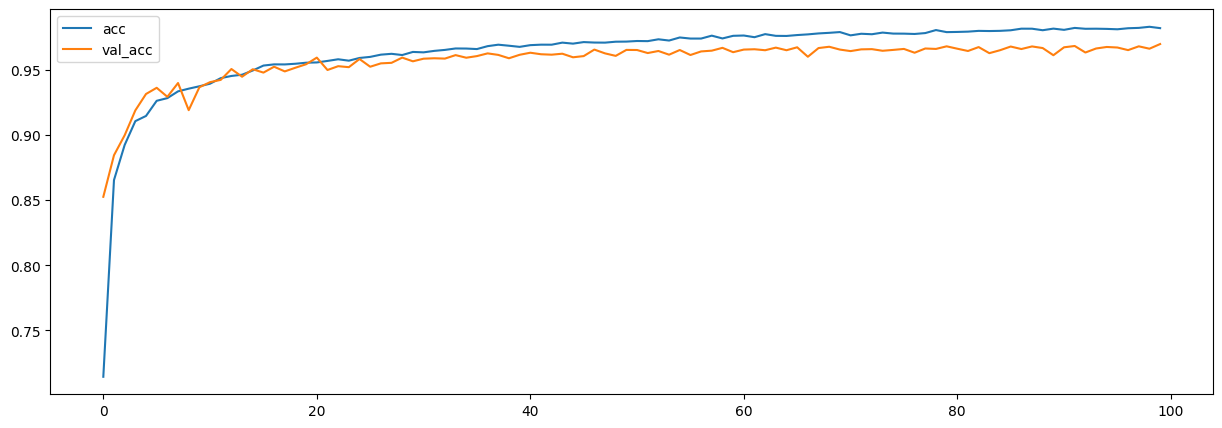

In [ ]:
plt.figure(figsize=(15,5)) # 가로, 세로
plt.plot(mnist_history.history['accuracy'], label='acc')
plt.plot(mnist_history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()